In [23]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

In [2]:
# Output file (CSV)
output_data_file = "output_data/cities.csv"

# Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats,lngs)

In [5]:
# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

573

# Perform API calls

In [6]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Creating base URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [7]:
# Starting URL for Weather Map API Call
#url = “http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=” + weather_api_key
# Create a list for city data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | ksenyevka
City not found. Skipping...
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | tolmachevo
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | ponta delgada
Processing Record 17 of Set 1 | hearst
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | dakar
Processing Recor

Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | lutry
Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | thunder bay
Processing Record 41 of Set 4 | gat
Processing Record 42 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | le port
Processing Record 46 of Set 4 | srednekolymsk
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | tarudant
City not found. Skipping...
Processing Record 49 of Set 4 | aklavik
Processing Record 0 of Set 5 | yeniseysk
Processing Record 1 of Set 5 | umm lajj
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | menongue
Processing Record 4 of Set 5 | verkhnyaya inta
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | aden
Processing Record 7 of Set 5 | sidhi
Processing Record 8 of Set 5 | motygino
Processing Record 9 of Set 5 | cayenne
Processing Re

Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | kanchanaburi
Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | tambacounda
Processing Record 32 of Set 8 | bonfim
Processing Record 33 of Set 8 | san patricio
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | bengkulu
Processing Record 36 of Set 8 | hays
Processing Record 37 of Set 8 | virginia beach
Processing Record 38 of Set 8 | stornoway
Processing Record 39 of Set 8 | starup
Processing Record 40 of Set 8 | manavalakurichi
Processing Record 41 of Set 8 | ashtabula
Processing Record 42 of Set 8 | kitimat
Processing Record 43 of Set 8 | nhulunbuy
Processing Record 44 of Set 8 | port hardy
Processing Record 45 of Set 8 | mindelo
Processing Record 46 of Set 8 | kamenka
Processing Record 47 of Set 8 | svetlogorsk
Processing Record 48 of Set 8 | zemio
Processing Record 49 of Set 8 | ewa beach
Processing Record 0 of Set 9 | daru
Processing Record 1 of Set 9 | aksarayskiy
Proc

Processing Record 18 of Set 12 | dicabisagan
Processing Record 19 of Set 12 | ndjole
Processing Record 20 of Set 12 | punta alta
Processing Record 21 of Set 12 | san juan
Processing Record 22 of Set 12 | mudgee
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,62.04,89,99,30.49,AU,1623258100
1,karratha,-20.7377,116.8463,74.88,57,98,8.19,AU,1623257834
2,barrow,71.2906,-156.7887,35.91,84,71,6.15,US,1623257689
3,ushuaia,-54.8000,-68.3000,46.06,49,75,0.00,AR,1623257696
4,rikitea,-23.1203,-134.9692,72.68,65,100,15.23,PF,1623257843


In [9]:
# Extract relevant fields from the DataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [10]:
# Export city_data into a CSV file
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Latitude vs Temperature

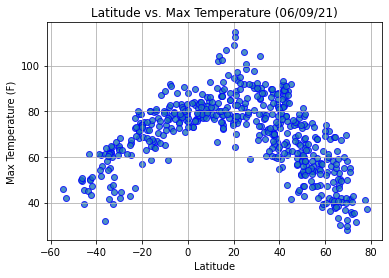

In [93]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, max_temps,
           edgecolor = "blue",
           linewidth =1,
           marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig(f"output_data/Latitude vs. Max Temperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity

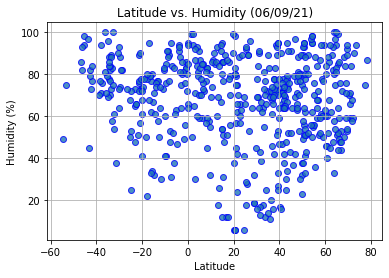

In [94]:
# Build scatter plot for latitude vs humidity
plt.scatter(lats, humidity,
           edgecolor = "blue",
           linewidth =1,
           marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Humidity.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness

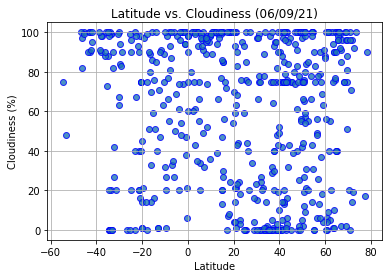

In [95]:
# Build scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness,
           edgecolor = "blue",
           linewidth =1,
           marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed

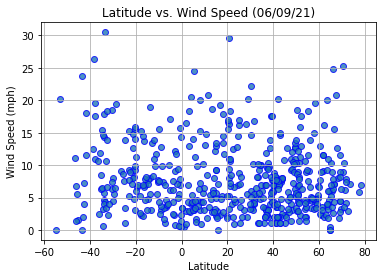

In [96]:
# Build scatter plot for latitude vs wind speed
plt.scatter(lats, wind_speed,
           edgecolor = "blue",
           linewidth =1,
           marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude vs. Wind Speed.png")

# Show plot
plt.show()

# Linear Regression

In [17]:
# Separate the plots into 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)

northern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] >= 0]
southern_hemisphere = city_data_pd.loc[city_data_pd["Lat"] < 0]

In [28]:
# Define a fuction for creating linear regression and line to plot
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-squared value is : {round(st.pearsonr(x_values, y_values)[0],2)}")
    return line_eq
    
# Define a function for annotation
def annotation(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize=15, color='red')

# Northern Hemisphere - Temperature (F) vs. Latitude

The r-squared value is : -0.73


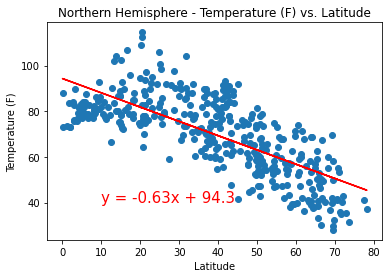

In [36]:
# Call linear_regression
data_plot = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call annotation
annotation(data_plot, 10, 40)

# Set title, xlabel, ylabel
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Temperature (F) vs. Latitude.png")

# Southern Hemisphere - Temperature (F) vs. Latitude

There is a good negative correlation between Latitude and Temperature in the Northern Hemisphere.

The r-squared value is : 0.81


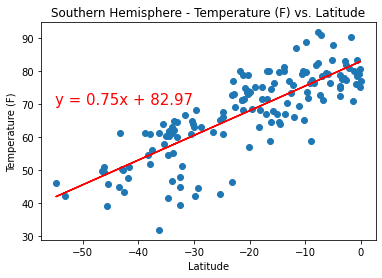

In [44]:
# Call linear_regression
data_plot = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call annotation
annotation(data_plot, -55, 70)

# Set title, xlabel, ylabel
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Temperature (F) vs. Latitude.png")

There is a strong positive correlation between Latitude and Temperature in the southern hemisphere.

# Northern Hemisphere - Humidity (%) vs. Latitude

The r-squared value is : 0.04


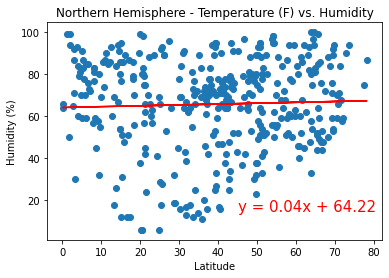

In [48]:
# Call linear_regression
data_plot = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call annotation
annotation(data_plot, 45, 15)

# Set title, xlabel, ylabel
plt.title("Northern Hemisphere - Temperature (F) vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

The correlation between Temperature and Humidity is very low in the northern hemisphere.

# Southern Hemisphere - Humidity (%) vs. Latitude

The r-squared value is : -0.13


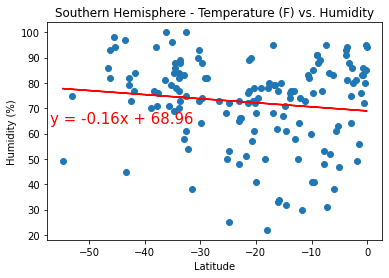

In [60]:
# Call linear_regression
data_plot = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call annotation
annotation(data_plot, -57, 64)

# Set title, xlabel, ylabel
plt.title("Southern Hemisphere - Temperature (F) vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

There is low negative correlation between Latitude and Humidity in the southern hemisphere.

# Northern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared value is : -0.05


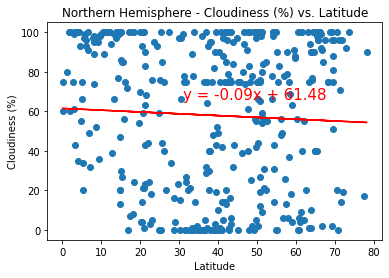

In [69]:
# Call linear_regression
data_plot = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call annotation
annotation(data_plot, 31, 66)

# Set title, xlabel, ylabel
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

There is a very low negative correlation between Latitude and Cloudiness in the northern hemisphere.

# Southern Hemisphere - Cloudiness (%) vs. Latitude

The r-squared value is : -0.08


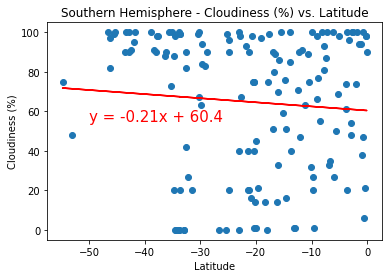

In [74]:
# Call linear_regression
data_plot = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call annotation
annotation(data_plot, -50, 55)

# Set title, xlabel, ylabel
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

There is very low negative correlation between Latitude and Cloudiness in the Southern Hemisphere.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared value is : -0.04


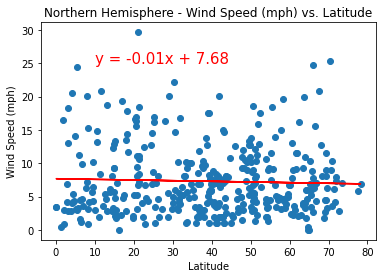

In [78]:
# Call linear_regression
data_plot = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call annotation
annotation(data_plot, 10, 25)

# Set title, xlabel, ylabel
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Southern Hemisphere - Wind Speed (mph) vs. Latitude

The r-squared value is : -0.2


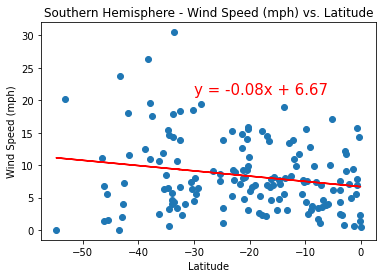

In [84]:
# Call linear_regression
data_plot = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call annotation
annotation(data_plot, -30, 21)

# Set title, xlabel, ylabel
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")